In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: April 2025
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

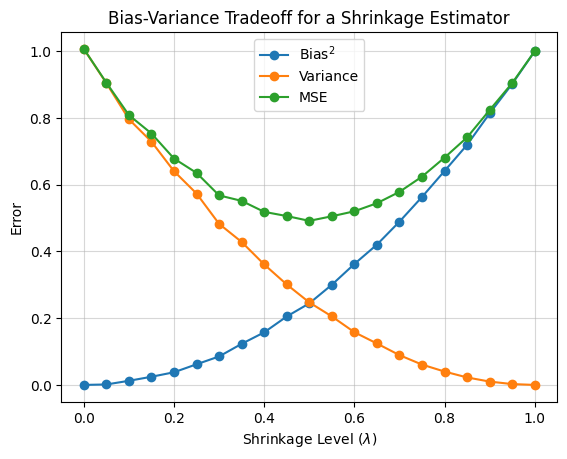

In [3]:
n_sims = 10_000      # Number of simulations
p = 1  # Dimension
theta = np.array([1.0])  # True mean
sigma = 1.0          # Noise std
alphas = np.linspace(0, 1, 21)  # Shrinkage parameters

# Containers for results
bias_sq = []
variance = []
mse = []

# Simulation over various shrinkage levels
for alpha in alphas:
    # Generate X ~ N(theta, sigma^2 I), shape = (n_sims, p)
    X = np.random.normal(loc=theta, scale=sigma, size=(n_sims, p))
    
    # Shrinkage estimator: (1-alpha)*X
    X_shrunk = (1 - alpha)*X
    
    # Empirical estimates across the n_sims draws 
    # 1) Mean (over simulations) of the estimator
    mean_estimator = np.mean(X_shrunk, axis=0)  # shape = (p,)
    
    # 2) Bias^2 = || E[estimator] - theta ||^2 (averaged per dimension or total)
    bias_vector = mean_estimator - theta
    bias_sq_value = np.mean(bias_vector**2)
    
    # 3) Variance = E[|| estimator - E[estimator] ||^2] / p
    centered = X_shrunk - mean_estimator  # shape = (n_sims, p)
    var_value = np.mean(np.sum(centered**2, axis=1)) / p
    
    # 4) MSE = E[|| estimator - theta ||^2]/p
    diff = X_shrunk - theta
    mse_value = np.mean(np.sum(diff**2, axis=1)) / p
    
    bias_sq.append(bias_sq_value)
    variance.append(var_value)
    mse.append(mse_value)

# Plot results
plt.plot(alphas, bias_sq, marker='o', label='$\mathrm{Bias}^2$')
plt.plot(alphas, variance, marker='o', label='Variance')
plt.plot(alphas, mse, marker='o', label='MSE')
plt.xlabel('Shrinkage Level ($\lambda$)')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff for a Shrinkage Estimator')
plt.legend(loc='upper center')
plt.grid(alpha=0.5)
plt.savefig('figures/bias_variance_tradeoff.pdf')